In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

Data 1 : COVID19_line_list_data

In [7]:
COVID19_line_list_data = pd.read_csv('COVID19_line_list_data.csv',delimiter=',',encoding='latin-1')
#print('Size of weather data frame is :',data.shape)
COVID19_line_list_data.info()
COVID19_line_list_data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿id                  1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

,ï»¿id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,äººæ°æ¥æ¥å®æ¹å¾®å,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,äººæ°æ¥æ¥å®æ¹å¾®å,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,...,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,...,0,NaN,å¤®è§æ°é»,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
COVID19_line_list_data = COVID19_line_list_data[['reporting date','location','country','gender','age','summary']]
COVID19_line_list_data.head()

,reporting date,location,country,gender,age,summary
0,1/20/2020,"Shenzhen, Guangdong",China,male,66.0,First confirmed imported COVID-19 pneumonia pa...
1,1/20/2020,Shanghai,China,female,56.0,First confirmed imported COVID-19 pneumonia pa...
2,1/21/2020,Zhejiang,China,male,46.0,First confirmed imported cases in Zhejiang: pa...
3,1/21/2020,Tianjin,China,female,60.0,new confirmed imported COVID-19 pneumonia in T...
4,1/21/2020,Tianjin,China,male,58.0,new confirmed imported COVID-19 pneumonia in T...


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

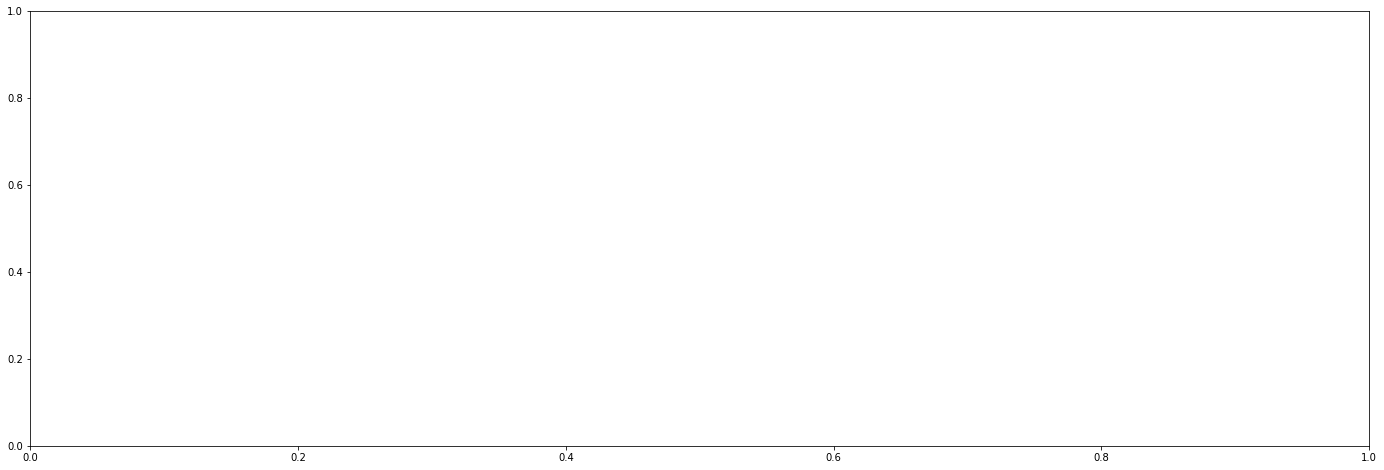

In [9]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
COVID19_line_list_data.groupby('reporting date').mean().sort_values(by='age', ascending=False)['age'].plot('bar', color='r',width=0.1,title='Cases: reporting, age', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('age')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(8)
ax.yaxis.label.set_fontsize(8)
print(COVID19_line_list_data.groupby('reporting date').mean().sort_values(by='age', ascending=False)['age'][[1,2]])


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

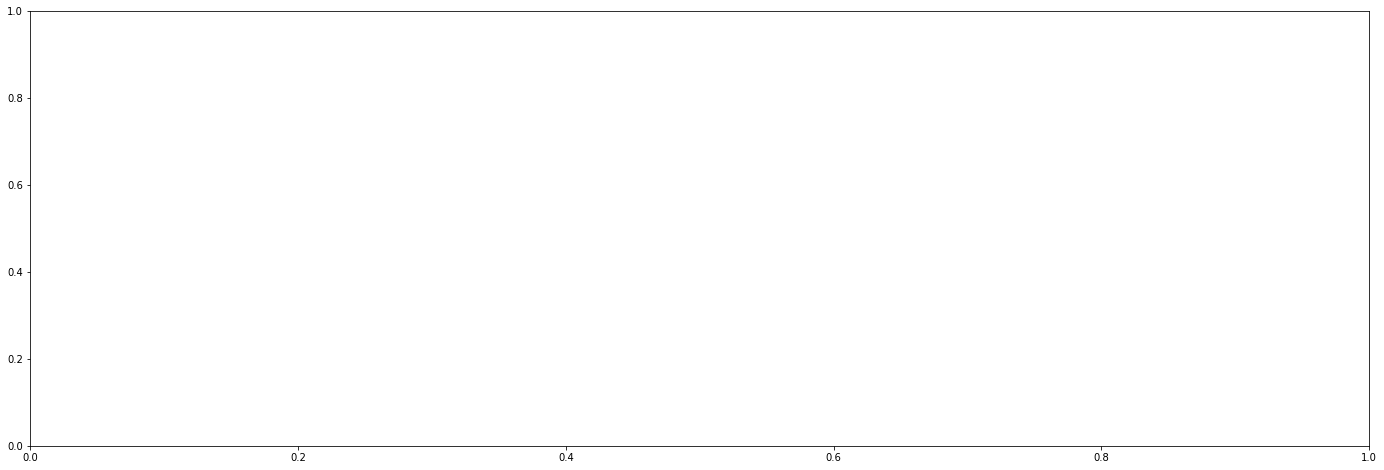

In [10]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
COVID19_line_list_data.groupby('summary').mean().sort_values(by='age', ascending=False)['age'].plot('bar', color='r',width=0.1,title='Cases: age, summary', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('age')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(COVID19_line_list_data.groupby('summary').mean().sort_values(by='age', ascending=False)['age'][[1,2]])

Data 2 : time_series_covid_19_confirmed

In [11]:
time_series_covid_19_confirmed = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv',delimiter=',',encoding='latin-1')
#print('Size of weather data frame is :',data.shape)
time_series_covid_19_confirmed.info()
time_series_covid_19_confirmed[0:57]

FileNotFoundError: [Errno 2] No such file or directory: '../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv'

NameError: name 'time_series_covid_19_confirmed' is not defined

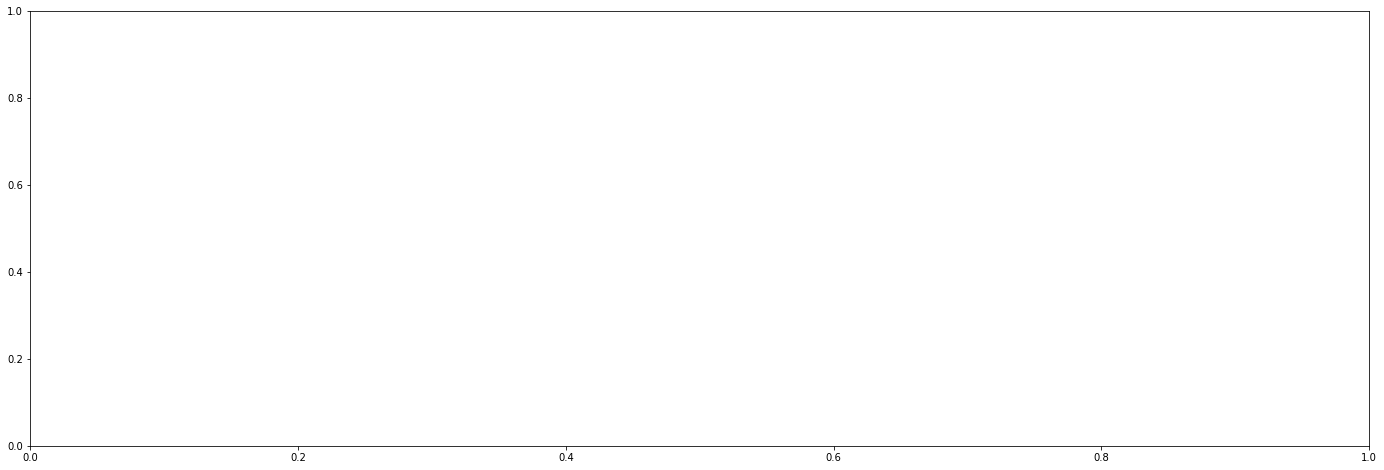

In [12]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
time_series_covid_19_confirmed.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'].plot('bar', color='r',width=0.3,title='time_series_covid_19_confirmed: 3/14/20', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('3/14/20')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
print(time_series_covid_19_confirmed.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'][[1,2]])

Data 3 : time_series_covid_19_deaths

In [13]:
time_series_covid_19_deaths = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv',delimiter=',',encoding='latin-1')
#print('Size of weather data frame is :',data.shape)
time_series_covid_19_deaths.info()
time_series_covid_19_deaths[0:10]

FileNotFoundError: [Errno 2] No such file or directory: '../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv'

NameError: name 'time_series_covid_19_deaths' is not defined

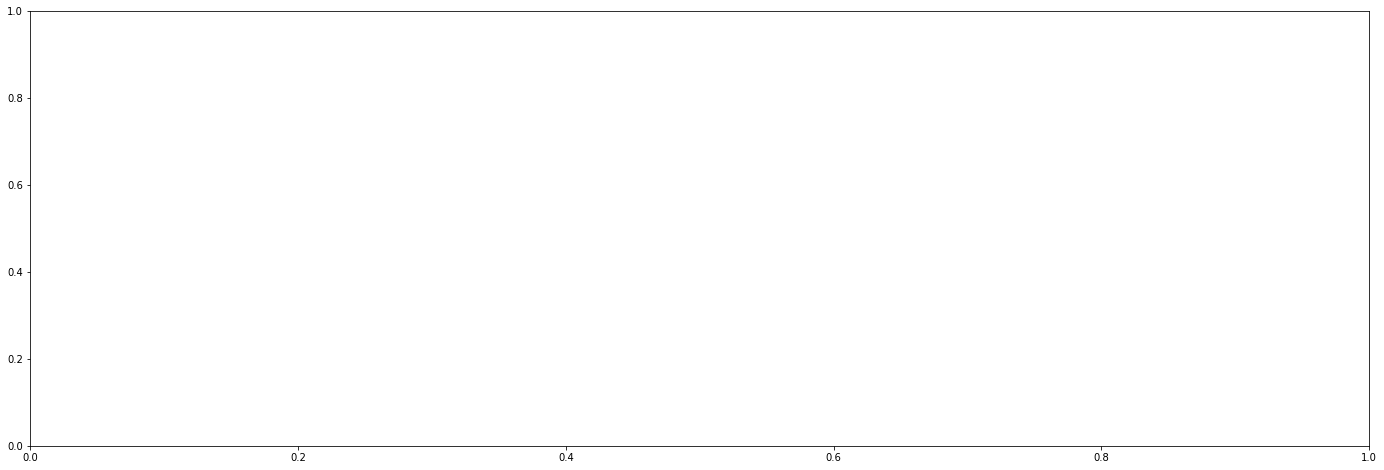

In [14]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
time_series_covid_19_deaths.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'].plot('bar', color='r',width=0.3,title='time_series_covid_19_deaths: 3/14/20', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('3/14/20')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
print(time_series_covid_19_deaths.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'][[1,2]])

Data 4 :  time_series_covid_19_recovered

In [15]:
time_series_covid_19_recovered = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv',delimiter=',',encoding='latin-1')
#print('Size of weather data frame is :',data.shape)
time_series_covid_19_recovered.info()
time_series_covid_19_recovered[0:10]

FileNotFoundError: [Errno 2] No such file or directory: '../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv'

NameError: name 'time_series_covid_19_recovered' is not defined

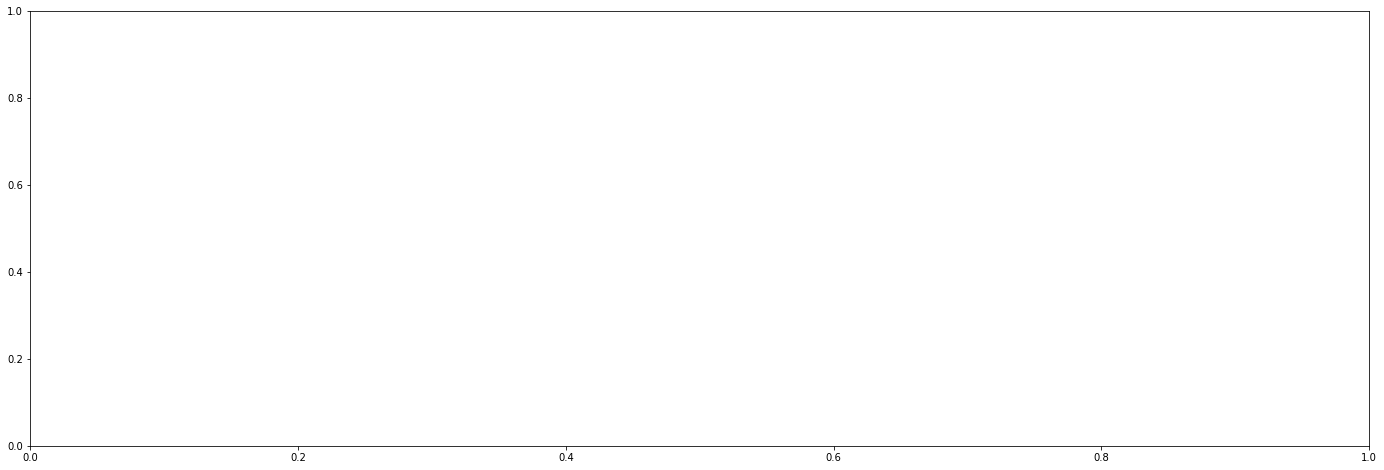

In [16]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(111)
time_series_covid_19_recovered.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'].plot('bar', color='r',width=0.3,title='time_series_covid_19_recovered : 3/14/20', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('3/14/20')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
print(time_series_covid_19_recovered.groupby('Country/Region').mean().sort_values(by='3/14/20', ascending=False)['3/14/20'][[1,2]])